In [ ]:
#Here we use Random within model length 7 as an example to show the model training process. 
#For other model, Please change the input data to before training.

In [3]:
#Import all required library
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import sklearn
import pickle

from textwrap import wrap
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,  classification_report

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


Model Evaluation: Random Forest 

				Confusion Matrix
			Predict non-interact		Predict interact
Actual non-interact		  2872				   17
Actual interact			    11				 2877


Precision (PPV):  0.9941 	Recall:  0.9962 
Accuracy:  0.9952 	 	F1-score:  0.9952 
NPV:  0.996 	 	 	Specificity:  0.9941 
 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      2889
           1       0.99      1.00      1.00      2888

    accuracy                           1.00      5777
   macro avg       1.00      1.00      1.00      5777
weighted avg       1.00      1.00      1.00      5777



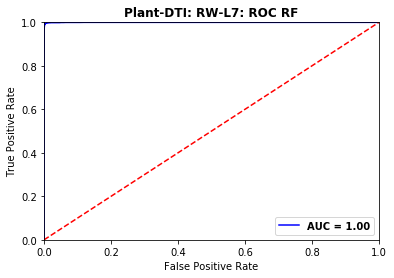

In [26]:
#For model construction, Random Forest with 100 trees

#read train_data
X_train = pd.read_csv('Data/train_data/70_holdout_X_train_len7_RW.csv')
Y_train = pd.read_csv('Data/train_data/70_holdout_Y_train_len7_RW.csv')

#read test_data
X_test = pd.read_csv('Data/test_data/30_holdout_X_test_len7_RW.csv')
Y_test = pd.read_csv('Data/test_data/30_holdout_Y_test_len7_RW.csv')

roc_plot_name = 'Plant-DTI: RW-L7: ROC RF'

#Model training data with RF classifier (100 trees)
rf_clf=RandomForestClassifier(n_estimators= 100,random_state= 100,oob_score=True)
rf_clf= rf_clf.fit(X_train, Y_train['class'])

#save model .sav
filename = 'OUTPUT/example_model.sav'
pickle.dump(rf_clf, open(filename, 'wb'))


#For showing model evaluation results
print(color.BOLD+color.UNDERLINE+"Model Evaluation: Random Forest \n"+ color.END)

#Predict test dataset
Y_pred = rf_clf.predict(X_test)


#print confusion matrix
conf=confusion_matrix(Y_test, Y_pred)
print(color.BOLD+'\t'+'\t'+'\t'+'\t'+'Confusion Matrix'+ color.END)
print(color.BOLD+'\t'+'\t'+'\t'+'Predict non-interact'+'\t'+'\t'+'Predict interact'+ color.END)
print(color.BOLD+'Actual non-interact'+'\t'+'\t'+ color.END+ '%6d'%conf[0][0]+'\t'+'\t'+'\t'+'\t'+'%5d'%conf[0][1])
print(color.BOLD+'Actual interact'+'\t'+'\t'+'\t'+ color.END+ '%6d'%conf[1][0]+'\t'+'\t'+'\t'+'\t'+'%5d'%conf[1][1]+"\n"+"\n")

#print classification report
class_report_dict=classification_report(Y_test, Y_pred, digits=3, output_dict=True)

#print classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
print(color.BOLD+"Precision (PPV): "+ color.END, '%.4f' %precision_score(Y_test, Y_pred),"\t"+
      color.BOLD+"Recall: "+ color.END, '%.4f' %recall_score(Y_test, Y_pred),"\n"+
      color.BOLD+"Accuracy: "+ color.END, '%.4f' %accuracy_score(Y_test, Y_pred),"\t","\t"+
      color.BOLD+"F1-score: "+ color.END, '%.4f' %f1_score(Y_test, Y_pred),"\n"+
      color.BOLD+"NPV: "+ color.END, '%.3f' %class_report_dict['0']['precision'],"\t","\t","\t"+ 
      color.BOLD+"Specificity: "+ color.END, '%.4f' %class_report_dict['0']['recall'],"\n","\n")

print(color.BOLD+"Classification Report: \n"+ color.END,classification_report(Y_test, Y_pred))


#For ROC plot

# Calculate the fpr and tpr for all thresholds of the classification
#calculate prob of class in all data in test-set
probs = rf_clf.predict_proba(X_test)

#select only positive class prob
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

legend_properties = {'weight':'bold'}

# plt ROC curve
import matplotlib.pyplot as plt
plt.title(roc_plot_name, weight='bold')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right',prop=legend_properties)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
